In [1]:
# radon transform
# voting to choose the line in one cluster

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import cv2
from sklearn.cluster import DBSCAN
import math
from datetime import timedelta
from scipy.ndimage import convolve
from tqdm import tqdm

from src import dasly, helper

In [2]:
das = dasly.Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    # start='20230901 103015',  # full 2 lines
    # start='20231005 082445',
    start='20230901 163110',  # part of a line
    # start='20231005 082445',
    # start='20230901 183015',  # noise
    # start='20230901 104015',  # 2 cars close to each other
    duration=60
)

Welcome to Dasly!
7 files, from 163104 to 163204


vmin: -7.9e-06, vmax: 7.9e-06


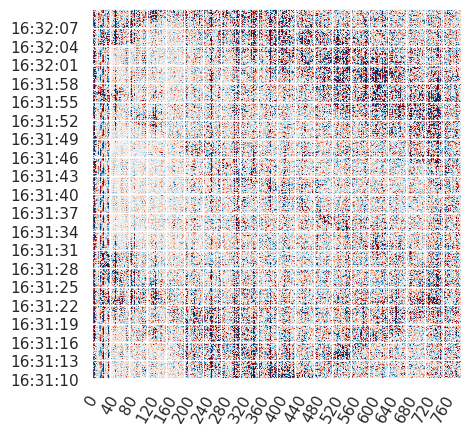

In [3]:
das.reset()
das.heatmap()

Downsampling factor: 125
New sampling rate: 8
vmin: -1.1e-07, vmax: 1.1e-07


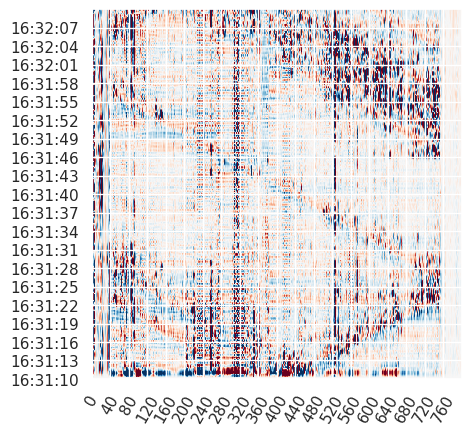

In [4]:
das.lowpass_filter(0.5)
das.decimate(sampling_rate=6)
das.heatmap()

vmin: -2.02e-08, vmax: 2.02e-08


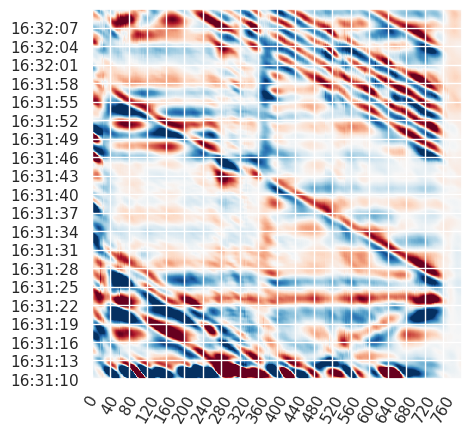

In [5]:
das.gauss_filter(-85, -80)
das.heatmap()

vmax: 2.7e-08


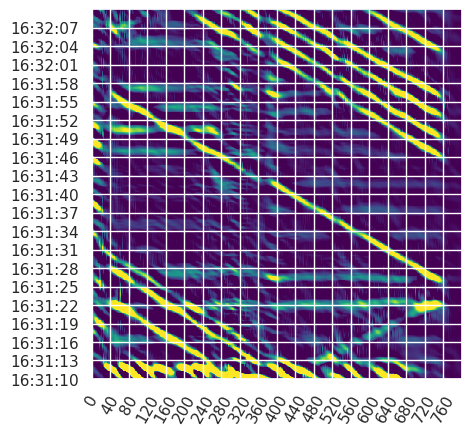

In [6]:
das.sobel_filter()
das.heatmap()

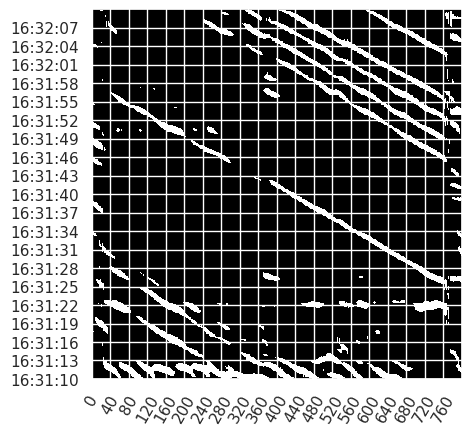

In [7]:
das.binary_filter()
das.heatmap()

89 lines are detected


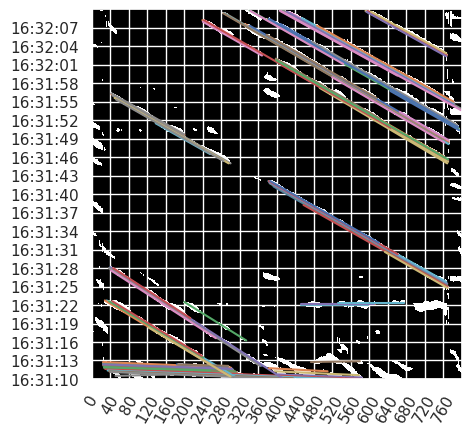

In [8]:
das.hough_transform()
das.heatmap()

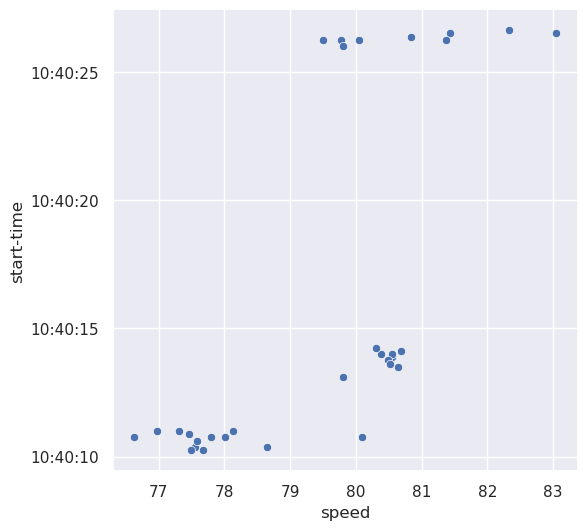

In [22]:
x = lines_df.speed
y = lines_df.start_time

# ideally 3 seconds (8*3 rows)) equal 10 km/h (~0.05 angle) difference
# ideally 2 seconds (8*2 rows)) equal 5 km/h (~0.02 angle) difference
# => 16:5 <=> 3.2:1
# x = x * 3.2


plt.figure(figsize=(6, 6))
sns.scatterplot(x=x, y=y)
plt.xlabel('speed');
plt.ylabel('start-time');

# Run all data

In [9]:
times = helper.generate_list_time('20231005 082445', '20231005 110545', 60)

In [10]:
detect_lines = pd.DataFrame()
for time in tqdm(times):
    das = dasly.Dasly()
    das.load_data(
        folder_path='/media/kptruong/yellow02/Aastfjordbrua/Aastfjordbrua/',
        start=time,
        duration=60
    )
    das.lowpass_filter(0.5)
    das.decimate(sampling_rate=6)
    das.gauss_filter()
    das.sobel_filter()
    das.binary_filter()
    das.hough_transform()
    detect_lines = pd.concat([detect_lines, das.lines_df.assign(batch=das.start)])

  0%|          | 0/161 [00:00<?, ?it/s]

Welcome to Dasly!
7 files, from 082444 to 082544
Downsampling factor: 125
New sampling rate: 8


  1%|          | 1/161 [00:07<19:53,  7.46s/it]

103 lines are detected
Welcome to Dasly!
7 files, from 082544 to 082644
Downsampling factor: 125
New sampling rate: 8


  1%|          | 2/161 [00:13<17:02,  6.43s/it]

38 lines are detected
Welcome to Dasly!
7 files, from 082644 to 082744
Downsampling factor: 125
New sampling rate: 8


  2%|▏         | 3/161 [00:19<16:48,  6.38s/it]

49 lines are detected
Welcome to Dasly!
7 files, from 082744 to 082844
Downsampling factor: 125
New sampling rate: 8


  2%|▏         | 4/161 [00:26<17:19,  6.62s/it]

95 lines are detected
Welcome to Dasly!
7 files, from 082844 to 082944
Downsampling factor: 125
New sampling rate: 8


  3%|▎         | 5/161 [00:33<17:21,  6.67s/it]

106 lines are detected
Welcome to Dasly!
7 files, from 082944 to 083044
Downsampling factor: 125
New sampling rate: 8


  4%|▎         | 6/161 [00:39<17:06,  6.62s/it]

89 lines are detected
Welcome to Dasly!
7 files, from 083044 to 083144
Downsampling factor: 125
New sampling rate: 8


  4%|▍         | 7/161 [00:45<16:22,  6.38s/it]

60 lines are detected
Welcome to Dasly!
7 files, from 083144 to 083244
Downsampling factor: 125
New sampling rate: 8


  5%|▍         | 8/161 [00:52<16:24,  6.44s/it]

69 lines are detected
Welcome to Dasly!
7 files, from 083244 to 083344
Downsampling factor: 125
New sampling rate: 8


  6%|▌         | 9/161 [00:58<15:55,  6.28s/it]

57 lines are detected
Welcome to Dasly!
7 files, from 083344 to 083444
Downsampling factor: 125
New sampling rate: 8


  6%|▌         | 10/161 [01:03<15:27,  6.14s/it]

41 lines are detected
Welcome to Dasly!
7 files, from 083444 to 083544
Downsampling factor: 125
New sampling rate: 8


  7%|▋         | 11/161 [01:10<15:34,  6.23s/it]

47 lines are detected
Welcome to Dasly!
7 files, from 083544 to 083644
Downsampling factor: 125
New sampling rate: 8


  7%|▋         | 12/161 [01:16<15:20,  6.18s/it]

54 lines are detected
Welcome to Dasly!
7 files, from 083644 to 083744
Downsampling factor: 125
New sampling rate: 8


  8%|▊         | 13/161 [01:22<14:56,  6.06s/it]

50 lines are detected
Welcome to Dasly!
7 files, from 083744 to 083844
Downsampling factor: 125
New sampling rate: 8


  9%|▊         | 14/161 [01:29<15:38,  6.39s/it]

91 lines are detected
Welcome to Dasly!
7 files, from 083844 to 083944
Downsampling factor: 125
New sampling rate: 8


  9%|▉         | 15/161 [01:35<15:35,  6.41s/it]

72 lines are detected
Welcome to Dasly!
7 files, from 083944 to 084044
Downsampling factor: 125
New sampling rate: 8


 10%|▉         | 16/161 [01:42<15:27,  6.40s/it]

59 lines are detected
Welcome to Dasly!
7 files, from 084044 to 084144
Downsampling factor: 125
New sampling rate: 8


 11%|█         | 17/161 [01:47<14:53,  6.20s/it]

43 lines are detected
Welcome to Dasly!
7 files, from 084144 to 084244
Downsampling factor: 125
New sampling rate: 8


 11%|█         | 18/161 [01:53<14:25,  6.05s/it]

44 lines are detected
Welcome to Dasly!
7 files, from 084244 to 084344
Downsampling factor: 125
New sampling rate: 8


 12%|█▏        | 19/161 [01:59<14:21,  6.06s/it]

64 lines are detected
Welcome to Dasly!
7 files, from 084344 to 084444
Downsampling factor: 125
New sampling rate: 8


 12%|█▏        | 20/161 [02:05<14:10,  6.03s/it]

48 lines are detected
Welcome to Dasly!
7 files, from 084444 to 084544
Downsampling factor: 125
New sampling rate: 8


 13%|█▎        | 21/161 [02:11<14:00,  6.00s/it]

56 lines are detected
Welcome to Dasly!
7 files, from 084544 to 084644
Downsampling factor: 125
New sampling rate: 8


 14%|█▎        | 22/161 [02:17<14:04,  6.08s/it]

74 lines are detected
Welcome to Dasly!
7 files, from 084644 to 084744
Downsampling factor: 125
New sampling rate: 8


 14%|█▍        | 23/161 [02:23<13:37,  5.92s/it]

41 lines are detected
Welcome to Dasly!
7 files, from 084744 to 084844
Downsampling factor: 125
New sampling rate: 8


 15%|█▍        | 24/161 [02:29<13:38,  5.98s/it]

55 lines are detected
Welcome to Dasly!
7 files, from 084844 to 084944
Downsampling factor: 125
New sampling rate: 8


 16%|█▌        | 25/161 [02:35<13:32,  5.98s/it]

70 lines are detected
Welcome to Dasly!
7 files, from 084944 to 085044
Downsampling factor: 125
New sampling rate: 8


 16%|█▌        | 26/161 [02:41<13:32,  6.02s/it]

80 lines are detected
Welcome to Dasly!
7 files, from 085044 to 085144
Downsampling factor: 125
New sampling rate: 8


 17%|█▋        | 27/161 [02:47<13:35,  6.08s/it]

83 lines are detected
Welcome to Dasly!
7 files, from 085144 to 085244
Downsampling factor: 125
New sampling rate: 8


 17%|█▋        | 28/161 [02:54<13:53,  6.26s/it]

95 lines are detected
Welcome to Dasly!
7 files, from 085244 to 085344
Downsampling factor: 125
New sampling rate: 8


 18%|█▊        | 29/161 [03:00<13:43,  6.24s/it]

64 lines are detected
Welcome to Dasly!
7 files, from 085344 to 085444
Downsampling factor: 125
New sampling rate: 8


 19%|█▊        | 30/161 [03:07<13:44,  6.30s/it]

93 lines are detected
Welcome to Dasly!
7 files, from 085444 to 085544
Downsampling factor: 125
New sampling rate: 8


 19%|█▉        | 31/161 [03:13<13:26,  6.20s/it]

66 lines are detected
Welcome to Dasly!
7 files, from 085544 to 085644
Downsampling factor: 125
New sampling rate: 8


 20%|█▉        | 32/161 [03:18<13:01,  6.05s/it]

40 lines are detected
Welcome to Dasly!
7 files, from 085644 to 085744
Downsampling factor: 125
New sampling rate: 8


 20%|██        | 33/161 [03:24<12:55,  6.06s/it]

58 lines are detected
Welcome to Dasly!
7 files, from 085744 to 085844
Downsampling factor: 125
New sampling rate: 8


 21%|██        | 34/161 [03:30<12:37,  5.97s/it]

58 lines are detected
Welcome to Dasly!
7 files, from 085844 to 085944
Downsampling factor: 125
New sampling rate: 8


 22%|██▏       | 35/161 [03:37<13:02,  6.21s/it]

98 lines are detected
Welcome to Dasly!
7 files, from 085944 to 090044
Downsampling factor: 125
New sampling rate: 8


 22%|██▏       | 36/161 [03:43<12:38,  6.07s/it]

43 lines are detected
Welcome to Dasly!
7 files, from 090044 to 090144
Downsampling factor: 125
New sampling rate: 8


 23%|██▎       | 37/161 [03:49<12:48,  6.20s/it]

77 lines are detected
Welcome to Dasly!
7 files, from 090144 to 090244
Downsampling factor: 125
New sampling rate: 8


 24%|██▎       | 38/161 [03:56<12:53,  6.29s/it]

86 lines are detected
Welcome to Dasly!
7 files, from 090244 to 090344
Downsampling factor: 125
New sampling rate: 8


 24%|██▍       | 39/161 [04:01<12:22,  6.08s/it]

45 lines are detected
Welcome to Dasly!
7 files, from 090344 to 090444
Downsampling factor: 125
New sampling rate: 8


 25%|██▍       | 40/161 [04:08<12:42,  6.30s/it]

116 lines are detected
Welcome to Dasly!
7 files, from 090444 to 090544
Downsampling factor: 125
New sampling rate: 8


 25%|██▌       | 41/161 [04:14<12:30,  6.25s/it]

65 lines are detected
Welcome to Dasly!
7 files, from 090544 to 090644
Downsampling factor: 125
New sampling rate: 8


 26%|██▌       | 42/161 [04:20<12:13,  6.16s/it]

44 lines are detected
Welcome to Dasly!
7 files, from 090644 to 090744
Downsampling factor: 125
New sampling rate: 8


 27%|██▋       | 43/161 [04:26<12:00,  6.11s/it]

56 lines are detected
Welcome to Dasly!
7 files, from 090744 to 090844
Downsampling factor: 125
New sampling rate: 8


 27%|██▋       | 44/161 [04:33<12:05,  6.20s/it]

88 lines are detected
Welcome to Dasly!
7 files, from 090844 to 090944
Downsampling factor: 125
New sampling rate: 8


 28%|██▊       | 45/161 [04:39<12:07,  6.27s/it]

83 lines are detected
Welcome to Dasly!
7 files, from 090944 to 091044
Downsampling factor: 125
New sampling rate: 8


 29%|██▊       | 46/161 [04:45<11:51,  6.19s/it]

65 lines are detected
Welcome to Dasly!
7 files, from 091044 to 091144
Downsampling factor: 125
New sampling rate: 8


 29%|██▉       | 47/161 [04:51<11:42,  6.16s/it]

72 lines are detected
Welcome to Dasly!
7 files, from 091144 to 091244
Downsampling factor: 125
New sampling rate: 8


 30%|██▉       | 48/161 [04:58<11:45,  6.25s/it]

89 lines are detected
Welcome to Dasly!
7 files, from 091244 to 091344
Downsampling factor: 125
New sampling rate: 8


 30%|███       | 49/161 [05:04<11:57,  6.41s/it]

130 lines are detected
Welcome to Dasly!
7 files, from 091344 to 091444
Downsampling factor: 125
New sampling rate: 8


 31%|███       | 50/161 [05:10<11:40,  6.31s/it]

64 lines are detected
Welcome to Dasly!
7 files, from 091444 to 091544
Downsampling factor: 125
New sampling rate: 8


 32%|███▏      | 51/161 [05:17<11:30,  6.28s/it]

77 lines are detected
Welcome to Dasly!
7 files, from 091544 to 091644
Downsampling factor: 125
New sampling rate: 8


 32%|███▏      | 52/161 [05:23<11:35,  6.38s/it]

92 lines are detected
Welcome to Dasly!
7 files, from 091644 to 091744
Downsampling factor: 125
New sampling rate: 8


 33%|███▎      | 53/161 [05:30<11:28,  6.37s/it]

77 lines are detected
Welcome to Dasly!
7 files, from 091744 to 091844
Downsampling factor: 125
New sampling rate: 8


 34%|███▎      | 54/161 [05:36<11:12,  6.28s/it]

82 lines are detected
Welcome to Dasly!
7 files, from 091844 to 091944
Downsampling factor: 125
New sampling rate: 8


 34%|███▍      | 55/161 [05:43<11:27,  6.49s/it]

144 lines are detected
Welcome to Dasly!
7 files, from 091944 to 092044
Downsampling factor: 125
New sampling rate: 8


 35%|███▍      | 56/161 [05:49<11:09,  6.37s/it]

51 lines are detected
Welcome to Dasly!
7 files, from 092044 to 092144
Downsampling factor: 125
New sampling rate: 8


 35%|███▌      | 57/161 [05:55<11:05,  6.40s/it]

91 lines are detected
Welcome to Dasly!
7 files, from 092144 to 092244
Downsampling factor: 125
New sampling rate: 8


 36%|███▌      | 58/161 [06:02<11:02,  6.44s/it]

114 lines are detected
Welcome to Dasly!
7 files, from 092244 to 092344
Downsampling factor: 125
New sampling rate: 8


 37%|███▋      | 59/161 [06:08<10:45,  6.33s/it]

58 lines are detected
Welcome to Dasly!
7 files, from 092344 to 092444
Downsampling factor: 125
New sampling rate: 8


 37%|███▋      | 60/161 [06:14<10:29,  6.23s/it]

56 lines are detected
Welcome to Dasly!
7 files, from 092444 to 092544
Downsampling factor: 125
New sampling rate: 8


 38%|███▊      | 61/161 [06:20<10:13,  6.14s/it]

67 lines are detected
Welcome to Dasly!
7 files, from 092544 to 092644
Downsampling factor: 125
New sampling rate: 8


 39%|███▊      | 62/161 [06:26<10:06,  6.12s/it]

88 lines are detected
Welcome to Dasly!
7 files, from 092644 to 092744
Downsampling factor: 125
New sampling rate: 8


 39%|███▉      | 63/161 [06:32<10:02,  6.15s/it]

107 lines are detected
Welcome to Dasly!
7 files, from 092744 to 092845
Downsampling factor: 125
New sampling rate: 8


 40%|███▉      | 64/161 [06:38<09:48,  6.06s/it]

53 lines are detected
Welcome to Dasly!
7 files, from 092845 to 092944
Downsampling factor: 125
New sampling rate: 8


 40%|████      | 65/161 [06:44<09:41,  6.06s/it]

62 lines are detected
Welcome to Dasly!
7 files, from 092944 to 093044
Downsampling factor: 125
New sampling rate: 8


 41%|████      | 66/161 [06:50<09:32,  6.02s/it]

45 lines are detected
Welcome to Dasly!
7 files, from 093044 to 093144
Downsampling factor: 125
New sampling rate: 8


 42%|████▏     | 67/161 [06:56<09:23,  5.99s/it]

58 lines are detected
Welcome to Dasly!
7 files, from 093144 to 093244
Downsampling factor: 125
New sampling rate: 8


 42%|████▏     | 68/161 [07:02<09:24,  6.07s/it]

86 lines are detected
Welcome to Dasly!
7 files, from 093244 to 093344
Downsampling factor: 125
New sampling rate: 8


 43%|████▎     | 69/161 [07:08<09:26,  6.16s/it]

103 lines are detected
Welcome to Dasly!
7 files, from 093344 to 093445
Downsampling factor: 125
New sampling rate: 8


 43%|████▎     | 70/161 [07:15<09:29,  6.25s/it]

83 lines are detected
Welcome to Dasly!
7 files, from 093445 to 093544
Downsampling factor: 125
New sampling rate: 8


 44%|████▍     | 71/161 [07:21<09:10,  6.12s/it]

56 lines are detected
Welcome to Dasly!
7 files, from 093544 to 093644
Downsampling factor: 125
New sampling rate: 8


 45%|████▍     | 72/161 [07:27<09:17,  6.26s/it]

103 lines are detected
Welcome to Dasly!
7 files, from 093644 to 093744
Downsampling factor: 125
New sampling rate: 8


 45%|████▌     | 73/161 [07:34<09:11,  6.27s/it]

90 lines are detected
Welcome to Dasly!
7 files, from 093744 to 093844
Downsampling factor: 125
New sampling rate: 8


 46%|████▌     | 74/161 [07:39<08:51,  6.10s/it]

60 lines are detected
Welcome to Dasly!
7 files, from 093844 to 093944
Downsampling factor: 125
New sampling rate: 8


 47%|████▋     | 75/161 [07:45<08:42,  6.07s/it]

49 lines are detected
Welcome to Dasly!
7 files, from 093944 to 094045
Downsampling factor: 125
New sampling rate: 8


 47%|████▋     | 76/161 [07:51<08:34,  6.05s/it]

64 lines are detected
Welcome to Dasly!
7 files, from 094045 to 094144
Downsampling factor: 125
New sampling rate: 8


 48%|████▊     | 77/161 [07:58<08:38,  6.18s/it]

93 lines are detected
Welcome to Dasly!
7 files, from 094144 to 094244
Downsampling factor: 125
New sampling rate: 8


 48%|████▊     | 78/161 [08:04<08:36,  6.23s/it]

79 lines are detected
Welcome to Dasly!
7 files, from 094244 to 094344
Downsampling factor: 125
New sampling rate: 8


 49%|████▉     | 79/161 [08:10<08:24,  6.16s/it]

71 lines are detected
Welcome to Dasly!
7 files, from 094344 to 094444
Downsampling factor: 125
New sampling rate: 8


 50%|████▉     | 80/161 [08:16<08:13,  6.09s/it]

70 lines are detected
Welcome to Dasly!
7 files, from 094444 to 094544
Downsampling factor: 125
New sampling rate: 8


 50%|█████     | 81/161 [08:22<08:10,  6.13s/it]

80 lines are detected
Welcome to Dasly!
7 files, from 094544 to 094645
Downsampling factor: 125
New sampling rate: 8


 51%|█████     | 82/161 [08:28<07:56,  6.03s/it]

66 lines are detected
Welcome to Dasly!
7 files, from 094645 to 094745
Downsampling factor: 125
New sampling rate: 8


 52%|█████▏    | 83/161 [08:34<07:48,  6.01s/it]

78 lines are detected
Welcome to Dasly!
7 files, from 094745 to 094844
Downsampling factor: 125
New sampling rate: 8


 52%|█████▏    | 84/161 [08:40<07:51,  6.12s/it]

94 lines are detected
Welcome to Dasly!
7 files, from 094844 to 094944
Downsampling factor: 125
New sampling rate: 8


 53%|█████▎    | 85/161 [08:47<07:57,  6.28s/it]

106 lines are detected
Welcome to Dasly!
7 files, from 094944 to 095044
Downsampling factor: 125
New sampling rate: 8


 53%|█████▎    | 86/161 [08:53<07:36,  6.08s/it]

54 lines are detected
Welcome to Dasly!
7 files, from 095044 to 095144
Downsampling factor: 125
New sampling rate: 8


 54%|█████▍    | 87/161 [08:58<07:22,  5.98s/it]

35 lines are detected
Welcome to Dasly!
7 files, from 095144 to 095245
Downsampling factor: 125
New sampling rate: 8


 55%|█████▍    | 88/161 [09:04<07:05,  5.83s/it]

45 lines are detected
Welcome to Dasly!
7 files, from 095245 to 095345
Downsampling factor: 125
New sampling rate: 8


 55%|█████▌    | 89/161 [09:10<07:10,  5.98s/it]

77 lines are detected
Welcome to Dasly!
7 files, from 095345 to 095444
Downsampling factor: 125
New sampling rate: 8


 56%|█████▌    | 90/161 [09:16<07:06,  6.00s/it]

70 lines are detected
Welcome to Dasly!
7 files, from 095444 to 095544
Downsampling factor: 125
New sampling rate: 8


 57%|█████▋    | 91/161 [09:23<07:11,  6.17s/it]

124 lines are detected
Welcome to Dasly!
7 files, from 095544 to 095644
Downsampling factor: 125
New sampling rate: 8


 57%|█████▋    | 92/161 [09:29<07:11,  6.25s/it]

104 lines are detected
Welcome to Dasly!
7 files, from 095644 to 095744
Downsampling factor: 125
New sampling rate: 8


 58%|█████▊    | 93/161 [09:35<06:55,  6.12s/it]

41 lines are detected
Welcome to Dasly!
7 files, from 095744 to 095845
Downsampling factor: 125
New sampling rate: 8


 58%|█████▊    | 94/161 [09:41<06:46,  6.07s/it]

49 lines are detected
Welcome to Dasly!
7 files, from 095845 to 095945
Downsampling factor: 125
New sampling rate: 8


 59%|█████▉    | 95/161 [09:47<06:34,  5.98s/it]

52 lines are detected
Welcome to Dasly!
7 files, from 095945 to 100044
Downsampling factor: 125
New sampling rate: 8


 60%|█████▉    | 96/161 [09:53<06:29,  5.99s/it]

45 lines are detected
Welcome to Dasly!
7 files, from 100044 to 100144
Downsampling factor: 125
New sampling rate: 8


 60%|██████    | 97/161 [10:00<06:36,  6.20s/it]

110 lines are detected
Welcome to Dasly!
7 files, from 100144 to 100244
Downsampling factor: 125
New sampling rate: 8


 61%|██████    | 98/161 [10:05<06:20,  6.04s/it]

42 lines are detected
Welcome to Dasly!
7 files, from 100244 to 100344
Downsampling factor: 125
New sampling rate: 8


 61%|██████▏   | 99/161 [10:11<06:17,  6.09s/it]

76 lines are detected
Welcome to Dasly!
7 files, from 100344 to 100445
Downsampling factor: 125
New sampling rate: 8


 62%|██████▏   | 100/161 [10:18<06:26,  6.33s/it]

111 lines are detected
Welcome to Dasly!
7 files, from 100445 to 100545
Downsampling factor: 125
New sampling rate: 8


 63%|██████▎   | 101/161 [10:25<06:20,  6.34s/it]

76 lines are detected
Welcome to Dasly!
7 files, from 100545 to 100644
Downsampling factor: 125
New sampling rate: 8


 63%|██████▎   | 102/161 [10:31<06:06,  6.21s/it]

68 lines are detected
Welcome to Dasly!
7 files, from 100644 to 100744
Downsampling factor: 125
New sampling rate: 8


 64%|██████▍   | 103/161 [10:36<05:53,  6.10s/it]

66 lines are detected
Welcome to Dasly!
7 files, from 100744 to 100844
Downsampling factor: 125
New sampling rate: 8


 65%|██████▍   | 104/161 [10:42<05:45,  6.06s/it]

60 lines are detected
Welcome to Dasly!
7 files, from 100844 to 100944
Downsampling factor: 125
New sampling rate: 8


 65%|██████▌   | 105/161 [10:48<05:37,  6.03s/it]

69 lines are detected
Welcome to Dasly!
7 files, from 100944 to 101045
Downsampling factor: 125
New sampling rate: 8


 66%|██████▌   | 106/161 [10:54<05:32,  6.04s/it]

89 lines are detected
Welcome to Dasly!
7 files, from 101045 to 101145
Downsampling factor: 125
New sampling rate: 8


 66%|██████▋   | 107/161 [11:00<05:22,  5.97s/it]

56 lines are detected
Welcome to Dasly!
7 files, from 101145 to 101245
Downsampling factor: 125
New sampling rate: 8


 67%|██████▋   | 108/161 [11:07<05:25,  6.14s/it]

89 lines are detected
Welcome to Dasly!
7 files, from 101245 to 101344
Downsampling factor: 125
New sampling rate: 8


 68%|██████▊   | 109/161 [11:12<05:06,  5.90s/it]

31 lines are detected
Welcome to Dasly!
7 files, from 101344 to 101444
Downsampling factor: 125
New sampling rate: 8


 68%|██████▊   | 110/161 [11:18<04:58,  5.85s/it]

34 lines are detected
Welcome to Dasly!
7 files, from 101444 to 101544
Downsampling factor: 125
New sampling rate: 8


 69%|██████▉   | 111/161 [11:23<04:48,  5.77s/it]

45 lines are detected
Welcome to Dasly!
7 files, from 101544 to 101645
Downsampling factor: 125
New sampling rate: 8


 70%|██████▉   | 112/161 [11:29<04:46,  5.84s/it]

71 lines are detected
Welcome to Dasly!
7 files, from 101645 to 101745
Downsampling factor: 125
New sampling rate: 8


 70%|███████   | 113/161 [11:35<04:38,  5.80s/it]

39 lines are detected
Welcome to Dasly!
7 files, from 101745 to 101845
Downsampling factor: 125
New sampling rate: 8


 71%|███████   | 114/161 [11:42<04:42,  6.01s/it]

82 lines are detected
Welcome to Dasly!
7 files, from 101845 to 101944
Downsampling factor: 125
New sampling rate: 8


 71%|███████▏  | 115/161 [11:47<04:33,  5.95s/it]

48 lines are detected
Welcome to Dasly!
7 files, from 101944 to 102044
Downsampling factor: 125
New sampling rate: 8


 72%|███████▏  | 116/161 [11:53<04:28,  5.96s/it]

68 lines are detected
Welcome to Dasly!
7 files, from 102044 to 102144
Downsampling factor: 125
New sampling rate: 8


 73%|███████▎  | 117/161 [12:00<04:24,  6.00s/it]

75 lines are detected
Welcome to Dasly!
7 files, from 102144 to 102245
Downsampling factor: 125
New sampling rate: 8


 73%|███████▎  | 118/161 [12:06<04:21,  6.08s/it]

86 lines are detected
Welcome to Dasly!
7 files, from 102245 to 102345
Downsampling factor: 125
New sampling rate: 8


 74%|███████▍  | 119/161 [12:12<04:21,  6.24s/it]

105 lines are detected
Welcome to Dasly!
7 files, from 102345 to 102445
Downsampling factor: 125
New sampling rate: 8


 75%|███████▍  | 120/161 [12:18<04:13,  6.19s/it]

78 lines are detected
Welcome to Dasly!
7 files, from 102445 to 102544
Downsampling factor: 125
New sampling rate: 8


 75%|███████▌  | 121/161 [12:24<04:03,  6.09s/it]

64 lines are detected
Welcome to Dasly!
7 files, from 102544 to 102644
Downsampling factor: 125
New sampling rate: 8


 76%|███████▌  | 122/161 [12:31<03:59,  6.14s/it]

101 lines are detected
Welcome to Dasly!
7 files, from 102644 to 102744
Downsampling factor: 125
New sampling rate: 8


 76%|███████▋  | 123/161 [12:37<03:58,  6.27s/it]

104 lines are detected
Welcome to Dasly!
7 files, from 102744 to 102845
Downsampling factor: 125
New sampling rate: 8


 77%|███████▋  | 124/161 [12:44<03:55,  6.37s/it]

94 lines are detected
Welcome to Dasly!
7 files, from 102845 to 102945
Downsampling factor: 125
New sampling rate: 8


 78%|███████▊  | 125/161 [12:50<03:44,  6.22s/it]

70 lines are detected
Welcome to Dasly!
7 files, from 102945 to 103045
Downsampling factor: 125
New sampling rate: 8


 78%|███████▊  | 126/161 [12:55<03:33,  6.11s/it]

52 lines are detected
Welcome to Dasly!
7 files, from 103045 to 103144
Downsampling factor: 125
New sampling rate: 8


 79%|███████▉  | 127/161 [13:01<03:25,  6.05s/it]

66 lines are detected
Welcome to Dasly!
7 files, from 103144 to 103244
Downsampling factor: 125
New sampling rate: 8


 80%|███████▉  | 128/161 [13:07<03:14,  5.88s/it]

48 lines are detected
Welcome to Dasly!
7 files, from 103244 to 103344
Downsampling factor: 125
New sampling rate: 8


 80%|████████  | 129/161 [13:13<03:10,  5.94s/it]

77 lines are detected
Welcome to Dasly!
7 files, from 103344 to 103445
Downsampling factor: 125
New sampling rate: 8


 81%|████████  | 130/161 [13:19<03:01,  5.86s/it]

43 lines are detected
Welcome to Dasly!
7 files, from 103445 to 103545
Downsampling factor: 125
New sampling rate: 8


 81%|████████▏ | 131/161 [13:25<02:56,  5.88s/it]

57 lines are detected
Welcome to Dasly!
7 files, from 103545 to 103645
Downsampling factor: 125
New sampling rate: 8


 82%|████████▏ | 132/161 [13:30<02:50,  5.87s/it]

62 lines are detected
Welcome to Dasly!
7 files, from 103645 to 103745
Downsampling factor: 125
New sampling rate: 8


 83%|████████▎ | 133/161 [13:36<02:43,  5.82s/it]

47 lines are detected
Welcome to Dasly!
7 files, from 103745 to 103844
Downsampling factor: 125
New sampling rate: 8


 83%|████████▎ | 134/161 [13:42<02:36,  5.79s/it]

44 lines are detected
Welcome to Dasly!
7 files, from 103844 to 103944
Downsampling factor: 125
New sampling rate: 8


 84%|████████▍ | 135/161 [13:48<02:34,  5.94s/it]

84 lines are detected
Welcome to Dasly!
7 files, from 103944 to 104045
Downsampling factor: 125
New sampling rate: 8


 84%|████████▍ | 136/161 [13:54<02:29,  5.96s/it]

74 lines are detected
Welcome to Dasly!
7 files, from 104045 to 104145
Downsampling factor: 125
New sampling rate: 8


 85%|████████▌ | 137/161 [14:00<02:24,  6.00s/it]

63 lines are detected
Welcome to Dasly!
7 files, from 104145 to 104245
Downsampling factor: 125
New sampling rate: 8


 86%|████████▌ | 138/161 [14:07<02:20,  6.09s/it]

76 lines are detected
Welcome to Dasly!
7 files, from 104245 to 104345
Downsampling factor: 125
New sampling rate: 8


 86%|████████▋ | 139/161 [14:12<02:12,  6.04s/it]

54 lines are detected
Welcome to Dasly!
7 files, from 104345 to 104444
Downsampling factor: 125
New sampling rate: 8


 87%|████████▋ | 140/161 [14:18<02:06,  6.02s/it]

40 lines are detected
Welcome to Dasly!
7 files, from 104444 to 104544
Downsampling factor: 125
New sampling rate: 8


 88%|████████▊ | 141/161 [14:25<02:03,  6.18s/it]

121 lines are detected
Welcome to Dasly!
7 files, from 104544 to 104645
Downsampling factor: 125
New sampling rate: 8


 88%|████████▊ | 142/161 [14:31<01:55,  6.06s/it]

59 lines are detected
Welcome to Dasly!
7 files, from 104645 to 104745
Downsampling factor: 125
New sampling rate: 8


 89%|████████▉ | 143/161 [14:37<01:49,  6.07s/it]

78 lines are detected
Welcome to Dasly!
7 files, from 104745 to 104845
Downsampling factor: 125
New sampling rate: 8


 89%|████████▉ | 144/161 [14:43<01:42,  6.00s/it]

57 lines are detected
Welcome to Dasly!
7 files, from 104845 to 104945
Downsampling factor: 125
New sampling rate: 8


 90%|█████████ | 145/161 [14:49<01:37,  6.09s/it]

87 lines are detected
Welcome to Dasly!
7 files, from 104945 to 105044
Downsampling factor: 125
New sampling rate: 8


 91%|█████████ | 146/161 [14:55<01:29,  5.97s/it]

47 lines are detected
Welcome to Dasly!
7 files, from 105044 to 105144
Downsampling factor: 125
New sampling rate: 8


 91%|█████████▏| 147/161 [15:01<01:22,  5.92s/it]

46 lines are detected
Welcome to Dasly!
7 files, from 105144 to 105245
Downsampling factor: 125
New sampling rate: 8


 92%|█████████▏| 148/161 [15:06<01:15,  5.83s/it]

64 lines are detected
Welcome to Dasly!
7 files, from 105245 to 105345
Downsampling factor: 125
New sampling rate: 8


 93%|█████████▎| 149/161 [15:12<01:10,  5.87s/it]

55 lines are detected
Welcome to Dasly!
7 files, from 105345 to 105445
Downsampling factor: 125
New sampling rate: 8


 93%|█████████▎| 150/161 [15:18<01:06,  6.03s/it]

125 lines are detected
Welcome to Dasly!
7 files, from 105445 to 105545
Downsampling factor: 125
New sampling rate: 8


 94%|█████████▍| 151/161 [15:25<01:01,  6.11s/it]

95 lines are detected
Welcome to Dasly!
7 files, from 105545 to 105644
Downsampling factor: 125
New sampling rate: 8


 94%|█████████▍| 152/161 [15:31<00:54,  6.08s/it]

45 lines are detected
Welcome to Dasly!
7 files, from 105644 to 105744
Downsampling factor: 125
New sampling rate: 8


 95%|█████████▌| 153/161 [15:38<00:51,  6.44s/it]

108 lines are detected
Welcome to Dasly!
7 files, from 105744 to 105845
Downsampling factor: 125
New sampling rate: 8


 96%|█████████▌| 154/161 [15:44<00:44,  6.35s/it]

53 lines are detected
Welcome to Dasly!
7 files, from 105845 to 105945
Downsampling factor: 125
New sampling rate: 8


 96%|█████████▋| 155/161 [15:51<00:38,  6.39s/it]

74 lines are detected
Welcome to Dasly!
7 files, from 105945 to 110045
Downsampling factor: 125
New sampling rate: 8


 97%|█████████▋| 156/161 [15:57<00:32,  6.40s/it]

58 lines are detected
Welcome to Dasly!
7 files, from 110045 to 110145
Downsampling factor: 125
New sampling rate: 8


 98%|█████████▊| 157/161 [16:04<00:26,  6.60s/it]

53 lines are detected
Welcome to Dasly!
7 files, from 110145 to 110245
Downsampling factor: 125
New sampling rate: 8


 98%|█████████▊| 158/161 [16:11<00:20,  6.76s/it]

115 lines are detected
Welcome to Dasly!
7 files, from 110245 to 110344
Downsampling factor: 125
New sampling rate: 8


 99%|█████████▉| 159/161 [16:18<00:13,  6.81s/it]

116 lines are detected
Welcome to Dasly!
7 files, from 110344 to 110445
Downsampling factor: 125
New sampling rate: 8


 99%|█████████▉| 160/161 [16:25<00:06,  6.66s/it]

54 lines are detected
Welcome to Dasly!
7 files, from 110445 to 110545
Downsampling factor: 125
New sampling rate: 8


100%|██████████| 161/161 [16:31<00:00,  6.16s/it]

67 lines are detected


In [70]:
reference = datetime.strptime('2023-10-05 08:24:45', '%Y-%m-%d %H:%M:%S')
reference

datetime.datetime(2023, 10, 5, 8, 24, 45)

In [80]:
detect_lines_filtered = (
    detect_lines
    .loc[lambda df: np.abs(df['speed']).between(40, 120)]
    .assign(left=lambda df: [datetime.combine(reference.date(), i) for i in df['left']])
    .assign(right=lambda df: [datetime.combine(reference.date(), i) for i in df['right']])
    .assign(middle=lambda df: [datetime.combine(reference.date(), i) for i in df['middle']])
    .assign(left_seconds=lambda df: (df['left'] - reference).dt.total_seconds())
    .assign(right_seconds=lambda df: (df['right'] - reference).dt.total_seconds())
    .assign(middle_seconds=lambda df: (df['middle'] - reference).dt.total_seconds())

    # .groupby('batch')
    # .count()
    # .describe()
    # .speed
    # .abs()
    # .describe()
    # .astype(int)
)
detect_lines_filtered

,x1,y1,x2,y2,length,angle,speed,left,middle,right,batch,left_seconds,right_seconds,middle_seconds
52,428,293,557,248,136.623570,-0.335639,-82.560000,2023-10-05 08:25:40.250,2023-10-05 08:25:22.750,2023-10-05 08:25:05.375,2023-10-05 08:24:45,55.250,20.375,37.750
53,428,294,640,221,224.216413,-0.331623,-83.638356,2023-10-05 08:25:40.125,2023-10-05 08:25:22.875,2023-10-05 08:25:05.625,2023-10-05 08:24:45,55.125,20.625,37.875
54,430,294,645,220,227.378539,-0.331486,-83.675676,2023-10-05 08:25:40.250,2023-10-05 08:25:23.000,2023-10-05 08:25:05.750,2023-10-05 08:24:45,55.250,20.750,38.000
55,125,399,274,348,157.486507,-0.329783,-84.141176,2023-10-05 08:25:40.125,2023-10-05 08:25:23.000,2023-10-05 08:25:05.875,2023-10-05 08:24:45,55.125,20.875,38.000
56,420,299,794,173,394.654279,-0.324956,-85.485714,2023-10-05 08:25:40.000,2023-10-05 08:25:23.125,2023-10-05 08:25:06.250,2023-10-05 08:24:45,55.000,21.250,38.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,41,303,342,404,317.493307,0.323743,85.829703,2023-10-05 11:05:21.125,2023-10-05 11:05:37.875,2023-10-05 11:05:54.625,2023-10-05 11:04:45,9636.125,9669.625,9652.875
63,408,428,556,477,155.900609,0.319722,86.987755,2023-10-05 11:05:21.500,2023-10-05 11:05:38.125,2023-10-05 11:05:54.625,2023-10-05 11:04:45,9636.500,9669.625,9653.125
64,47,306,353,410,323.190346,0.327621,84.738462,2023-10-05 11:05:21.250,2023-10-05 11:05:38.125,2023-10-05 11:05:55.125,2023-10-05 11:04:45,9636.250,9670.125,9653.125
65,117,331,352,410,247.923375,0.324302,85.670886,2023-10-05 11:05:21.375,2023-10-05 11:05:38.250,2023-10-05 11:05:55.000,2023-10-05 11:04:45,9636.375,9670.000,9653.250


In [81]:
from typing import Union
from datetime import datetime, timedelta
def metric(x: Union[np.array, list], y: Union[np.array, list]) -> float:
    distance = np.abs(np.array(x) - np.array(y)).sum()
    return distance

In [90]:
cluster = DBSCAN(
    eps=2+1+0,
    min_samples=1,
    metric=metric
)

cluster = cluster.fit(detect_lines_filtered[['left_seconds', 'right_seconds', 'middle_seconds']])
# cluster = [str(i) for i in cluster]

In [1057]:
logs = pd.read_excel('vehicle-logs.xlsx')
log_right = (
    logs
    .loc[lambda df: df['Direction map'] == 'Åstfjordbrua -> Trondheim']
)
print(log_right.shape)
log_right.head()

(171, 6)


,Time,Type,Trailer,Direction camera,Direction map,Note
0,2023-10-05 10:24:44.210,Car,NaN,coming close,Åstfjordbrua -> Trondheim,NaN
2,2023-10-05 10:27:18.030,Car,NaN,coming close,Åstfjordbrua -> Trondheim,NaN
5,2023-10-05 10:27:51.620,Car,NaN,coming close,Åstfjordbrua -> Trondheim,NaN
12,2023-10-05 10:30:37.050,Car,NaN,coming close,Åstfjordbrua -> Trondheim,NaN
13,2023-10-05 10:30:39.030,Car,NaN,coming close,Åstfjordbrua -> Trondheim,NaN


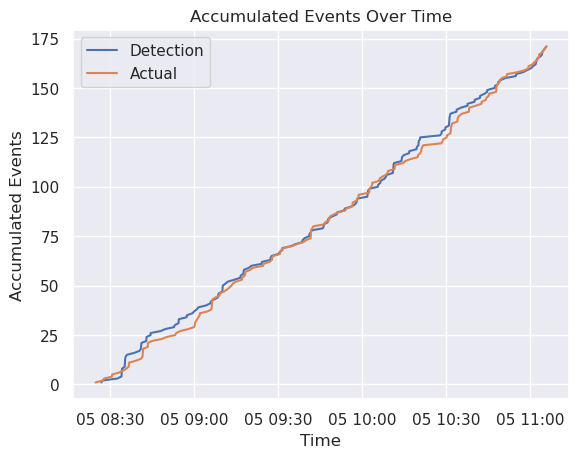

In [1058]:


# # Sample data for lists A and B
# list_A = final_result['start']
# list_B = logs['Time']

# # Convert strings to datetime objects
# time_format = '%Y%m%d %H%M%S'
# time_A = [datetime.strptime(time_str, time_format) for time_str in list_A]
# time_B = [datetime.strptime(time_str, time_format) for time_str in list_B]

time_A = final_final['start_time_avg']
time_B = log_right['Time']
time_B = [i - timedelta(hours=2) for i in time_B]


# Sort the time and create corresponding event count arrays
sorted_time_A, count_A = zip(*sorted(zip(time_A, range(1, len(time_A)+1))))
sorted_time_B, count_B = zip(*sorted(zip(time_B, range(1, len(time_B)+1))))

# Plotting
plt.plot(sorted_time_A, count_A, label='Detection')
plt.plot(sorted_time_B, count_B, label='Actual')

# Formatting plot
plt.xlabel('Time')
plt.ylabel('Accumulated Events')
plt.title('Accumulated Events Over Time')
plt.legend()
plt.grid(True)
plt.show()
